First few rows of the dataset:
            Region  Year  Wine   Beer  Vodka  Sparkling wine  Brandy  Сider  \
0  Belgorod Oblast  2017  1.79  60.00   3.52            0.78    0.31   1.52   
1   Bryansk Oblast  2017  3.02  34.21   4.29            0.83    0.46   0.86   
2  Vladimir Oblast  2017  3.70  58.93   6.73            0.91    0.78   1.60   
3  Voronezh Oblast  2017  2.68  33.17   3.69            1.04    0.60   0.91   
4   Ivanovo Oblast  2017  3.42  41.01   5.69            0.83    0.60   1.36   

   Liqueurs  Total alcohol consumption (in liters of pure alcohol per capita)  
0      0.14                                                5.6                 
1      0.69                                                4.8                 
2      0.54                                                7.5                 
3      0.32                                                4.4                 
4      0.61                                                5.9                 

Missing value

<ipython-input-11-b0b1c7cd0246>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


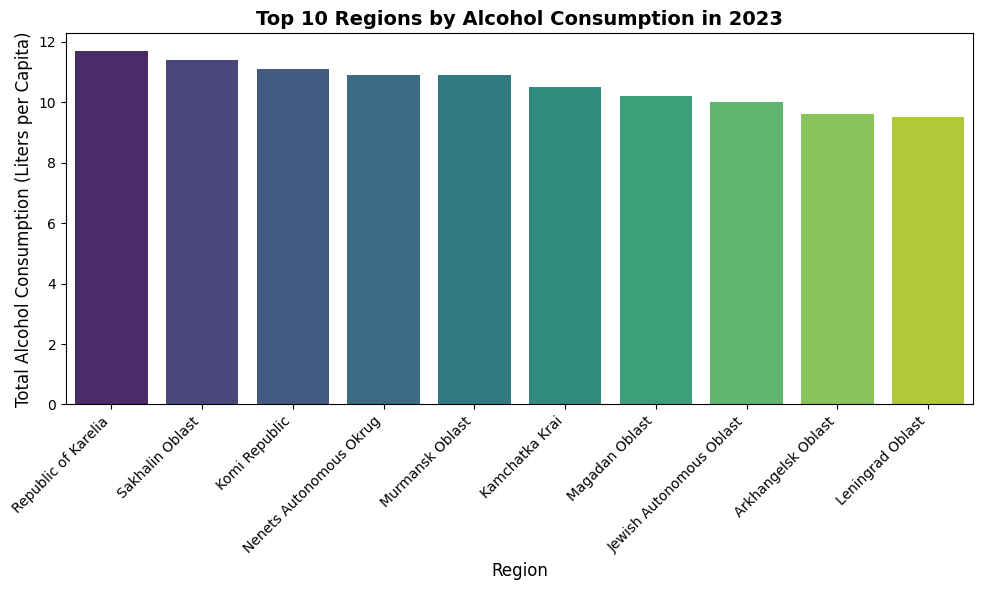

<ipython-input-11-b0b1c7cd0246>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_consumption_by_year = df.groupby('Year')['Total alcohol consumption (in liters of pure alcohol per capita)'].mean()


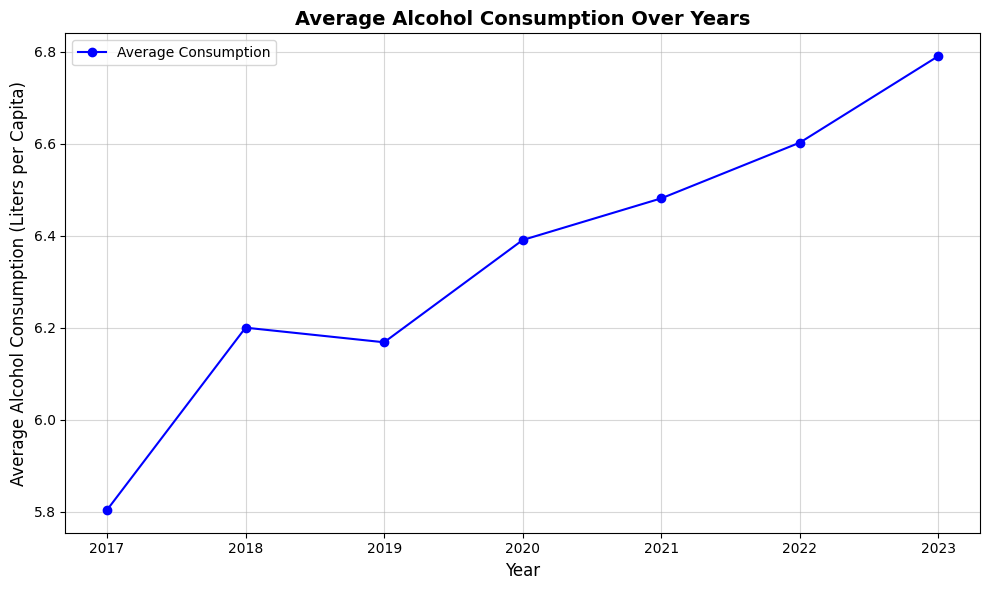

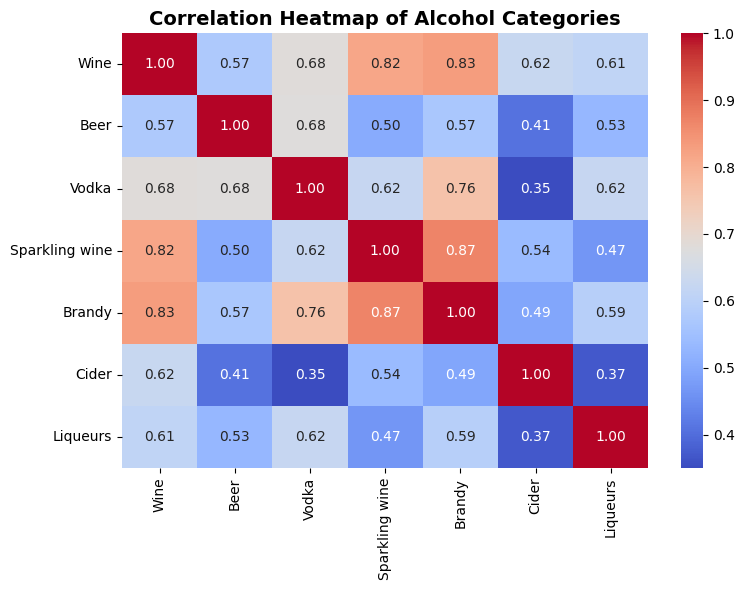

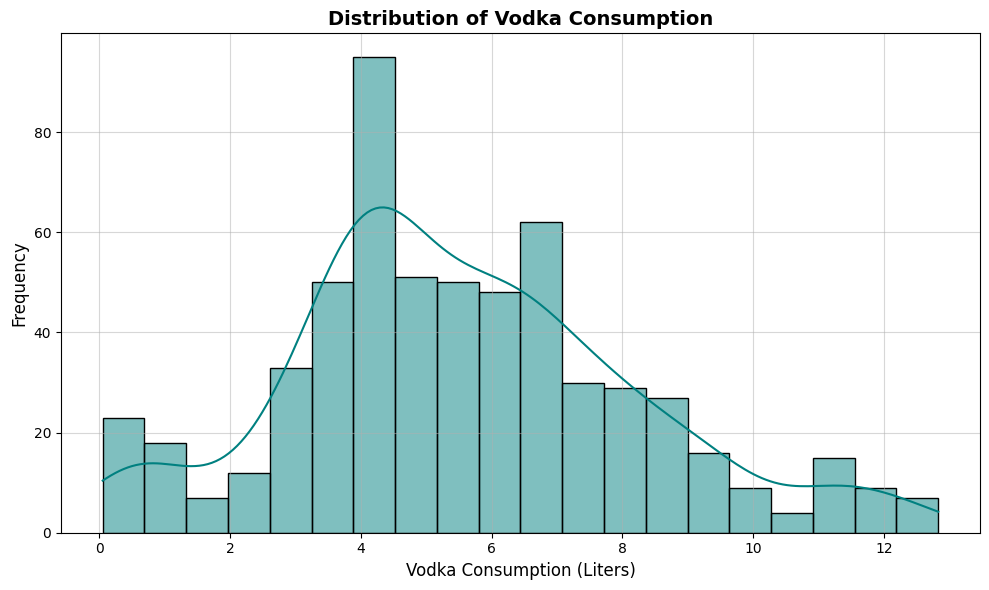

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Consumption of alcoholic beverages in Russia 2017-2023.csv"
df = pd.read_csv(file_path)

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Dataset information
print("\nDataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Convert Year to a categorical variable for better plotting
df['Year'] = df['Year'].astype('category')

# Plot 1: Top 10 regions by total alcohol consumption in 2023
df_2023 = df[df['Year'] == 2023]
top_10_regions = df_2023.nlargest(10, 'Total alcohol consumption (in liters of pure alcohol per capita)')

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Region',
    y='Total alcohol consumption (in liters of pure alcohol per capita)',
    data=top_10_regions,
    palette='viridis'
)
plt.title("Top 10 Regions by Alcohol Consumption in 2023", fontsize=14, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Alcohol Consumption (Liters per Capita)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 2: Trend of average alcohol consumption over years
avg_consumption_by_year = df.groupby('Year')['Total alcohol consumption (in liters of pure alcohol per capita)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(
    avg_consumption_by_year.index,
    avg_consumption_by_year.values,
    marker='o',
    linestyle='-',
    color='b',
    label='Average Consumption'
)
plt.title("Average Alcohol Consumption Over Years", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Alcohol Consumption (Liters per Capita)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: Heatmap of correlations between alcohol categories
correlation_matrix = df.iloc[:, 2:-1].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title("Correlation Heatmap of Alcohol Categories", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#  Distribution of Vodka Consumption
plt.figure(figsize=(10, 6))
sns.histplot(
    df['Vodka'],
    bins=20,
    kde=True,
    color='teal',
    edgecolor='black'
)
plt.title("Distribution of Vodka Consumption", fontsize=14, fontweight='bold')
plt.xlabel("Vodka Consumption (Liters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()